In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle

In [33]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/happiness_score_dataset.csv')
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [34]:
print('shape of data frame:',df.shape)
print('-----------------------'),
print('columns of data fram:::::::::',df.columns)
print('----------------------------------')
print('data types:',df.dtypes)
print('***********************************')

shape of data frame: (158, 12)
-----------------------
columns of data fram::::::::: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
----------------------------------
data types: Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
***********************************


In [35]:
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


<AxesSubplot:>

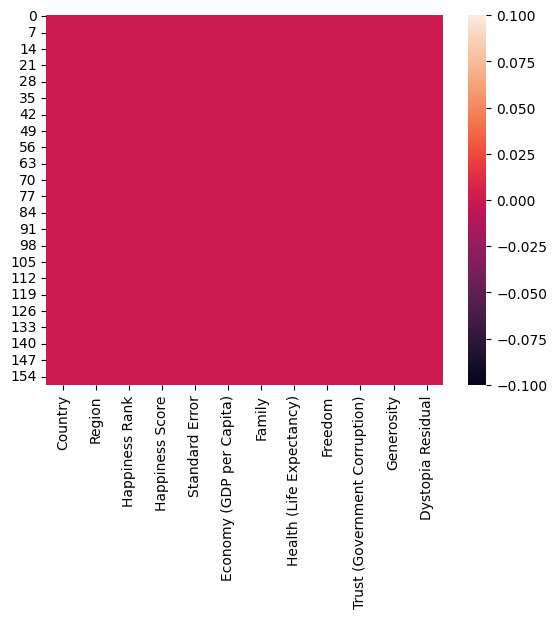

In [36]:
sns.heatmap(data=df.isnull())

In [37]:
for column in df.columns:
    un=df[column].unique() 
    print(column,un.size)

for column in df.columns:
    if df[column].unique==True:
        print('As per initial observation the column is a unique one:',column)
    else:pass 
    print('non unique')          

Country 158
Region 10
Happiness Rank 157
Happiness Score 157
Standard Error 153
Economy (GDP per Capita) 158
Family 158
Health (Life Expectancy) 157
Freedom 158
Trust (Government Corruption) 157
Generosity 158
Dystopia Residual 158
non unique
non unique
non unique
non unique
non unique
non unique
non unique
non unique
non unique
non unique
non unique
non unique


In [38]:
df_n=df.drop(columns=['Region','Country'])
df_c= pd.DataFrame(df, columns=['Country','Region','Happiness Score'])

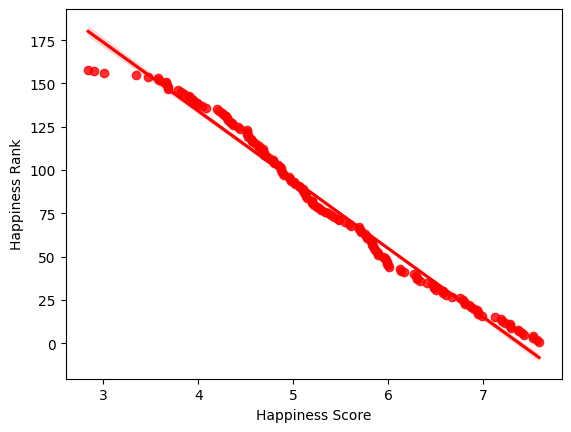

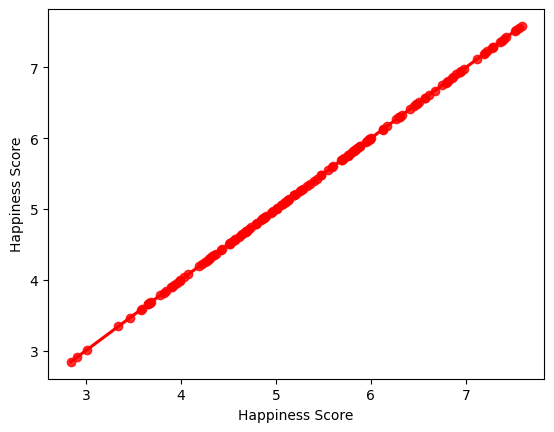

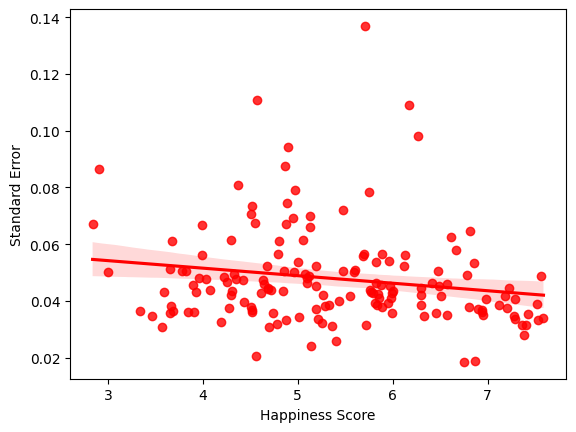

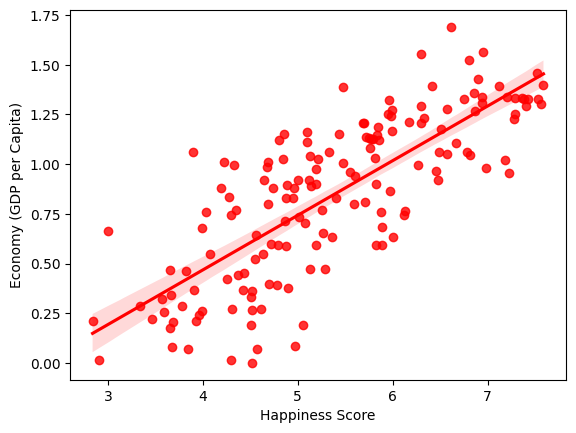

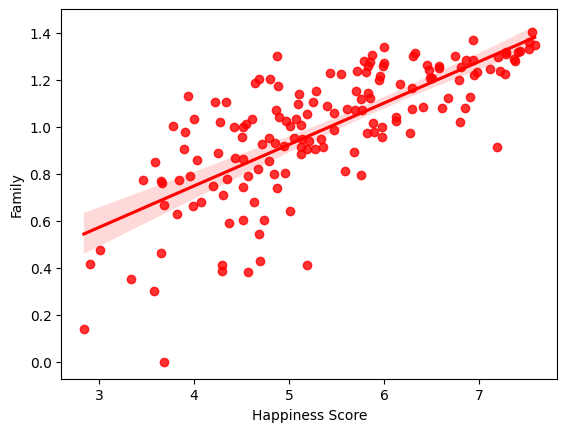

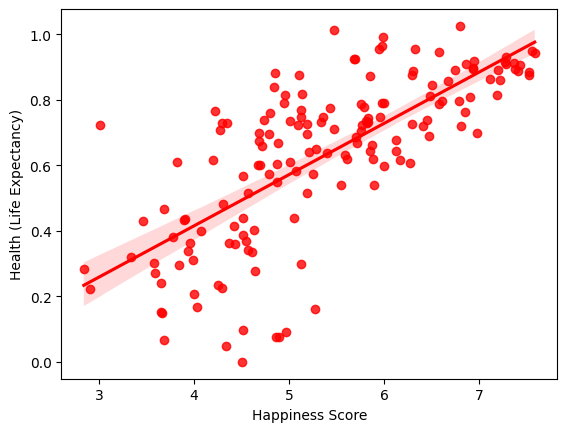

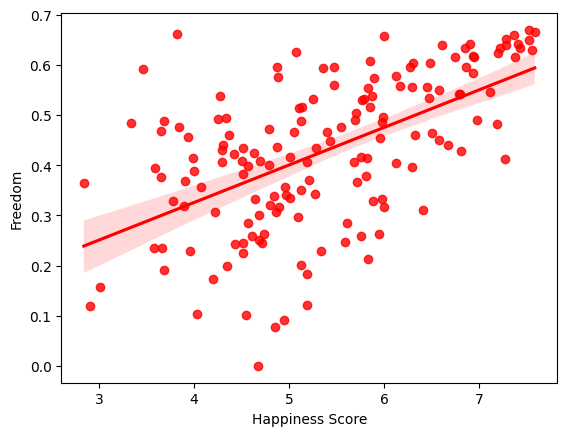

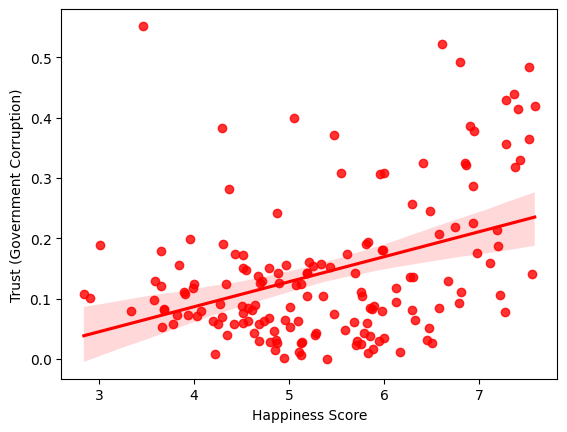

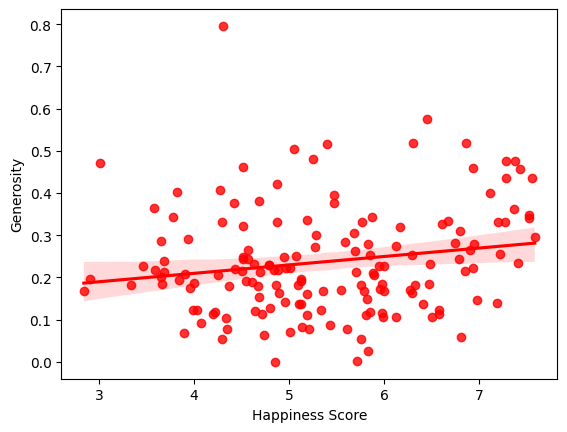

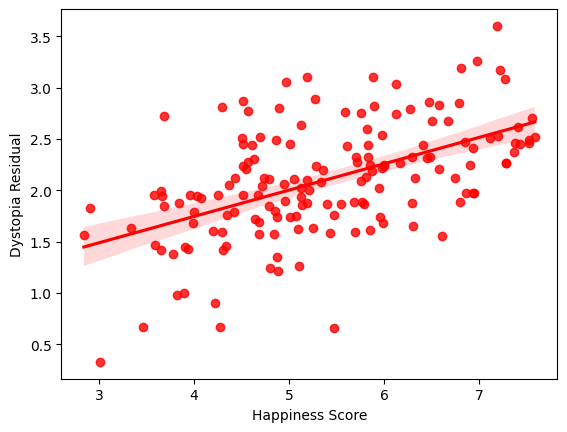

In [39]:
for column in df_n.columns:
    sns.regplot(data=df_n,x='Happiness Score',y=column,color='red')
    plt.show()    

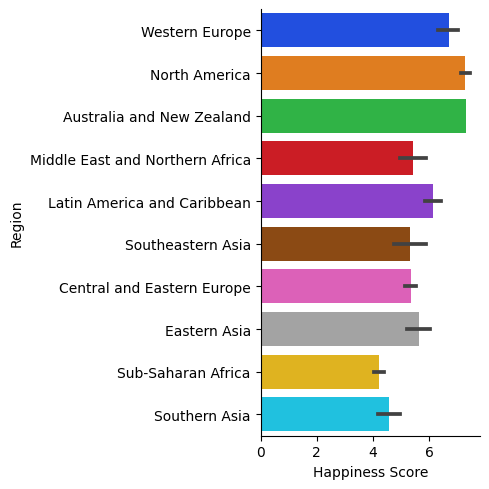

In [40]:
sns.catplot(data=df_c,y='Region',x='Happiness Score',kind='bar',palette='bright')
plt.show()

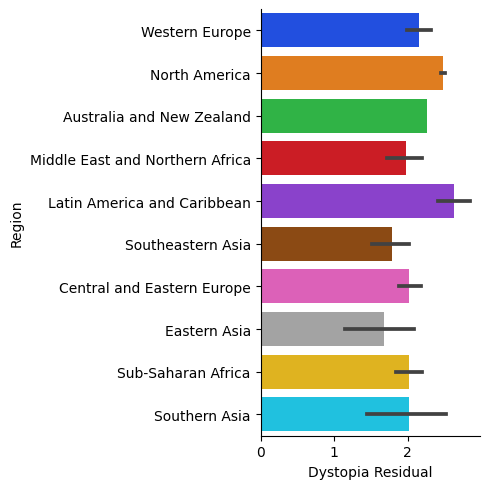

In [41]:
sns.catplot(data=df,y='Region',x='Dystopia Residual',kind='bar',palette='bright')
plt.show()

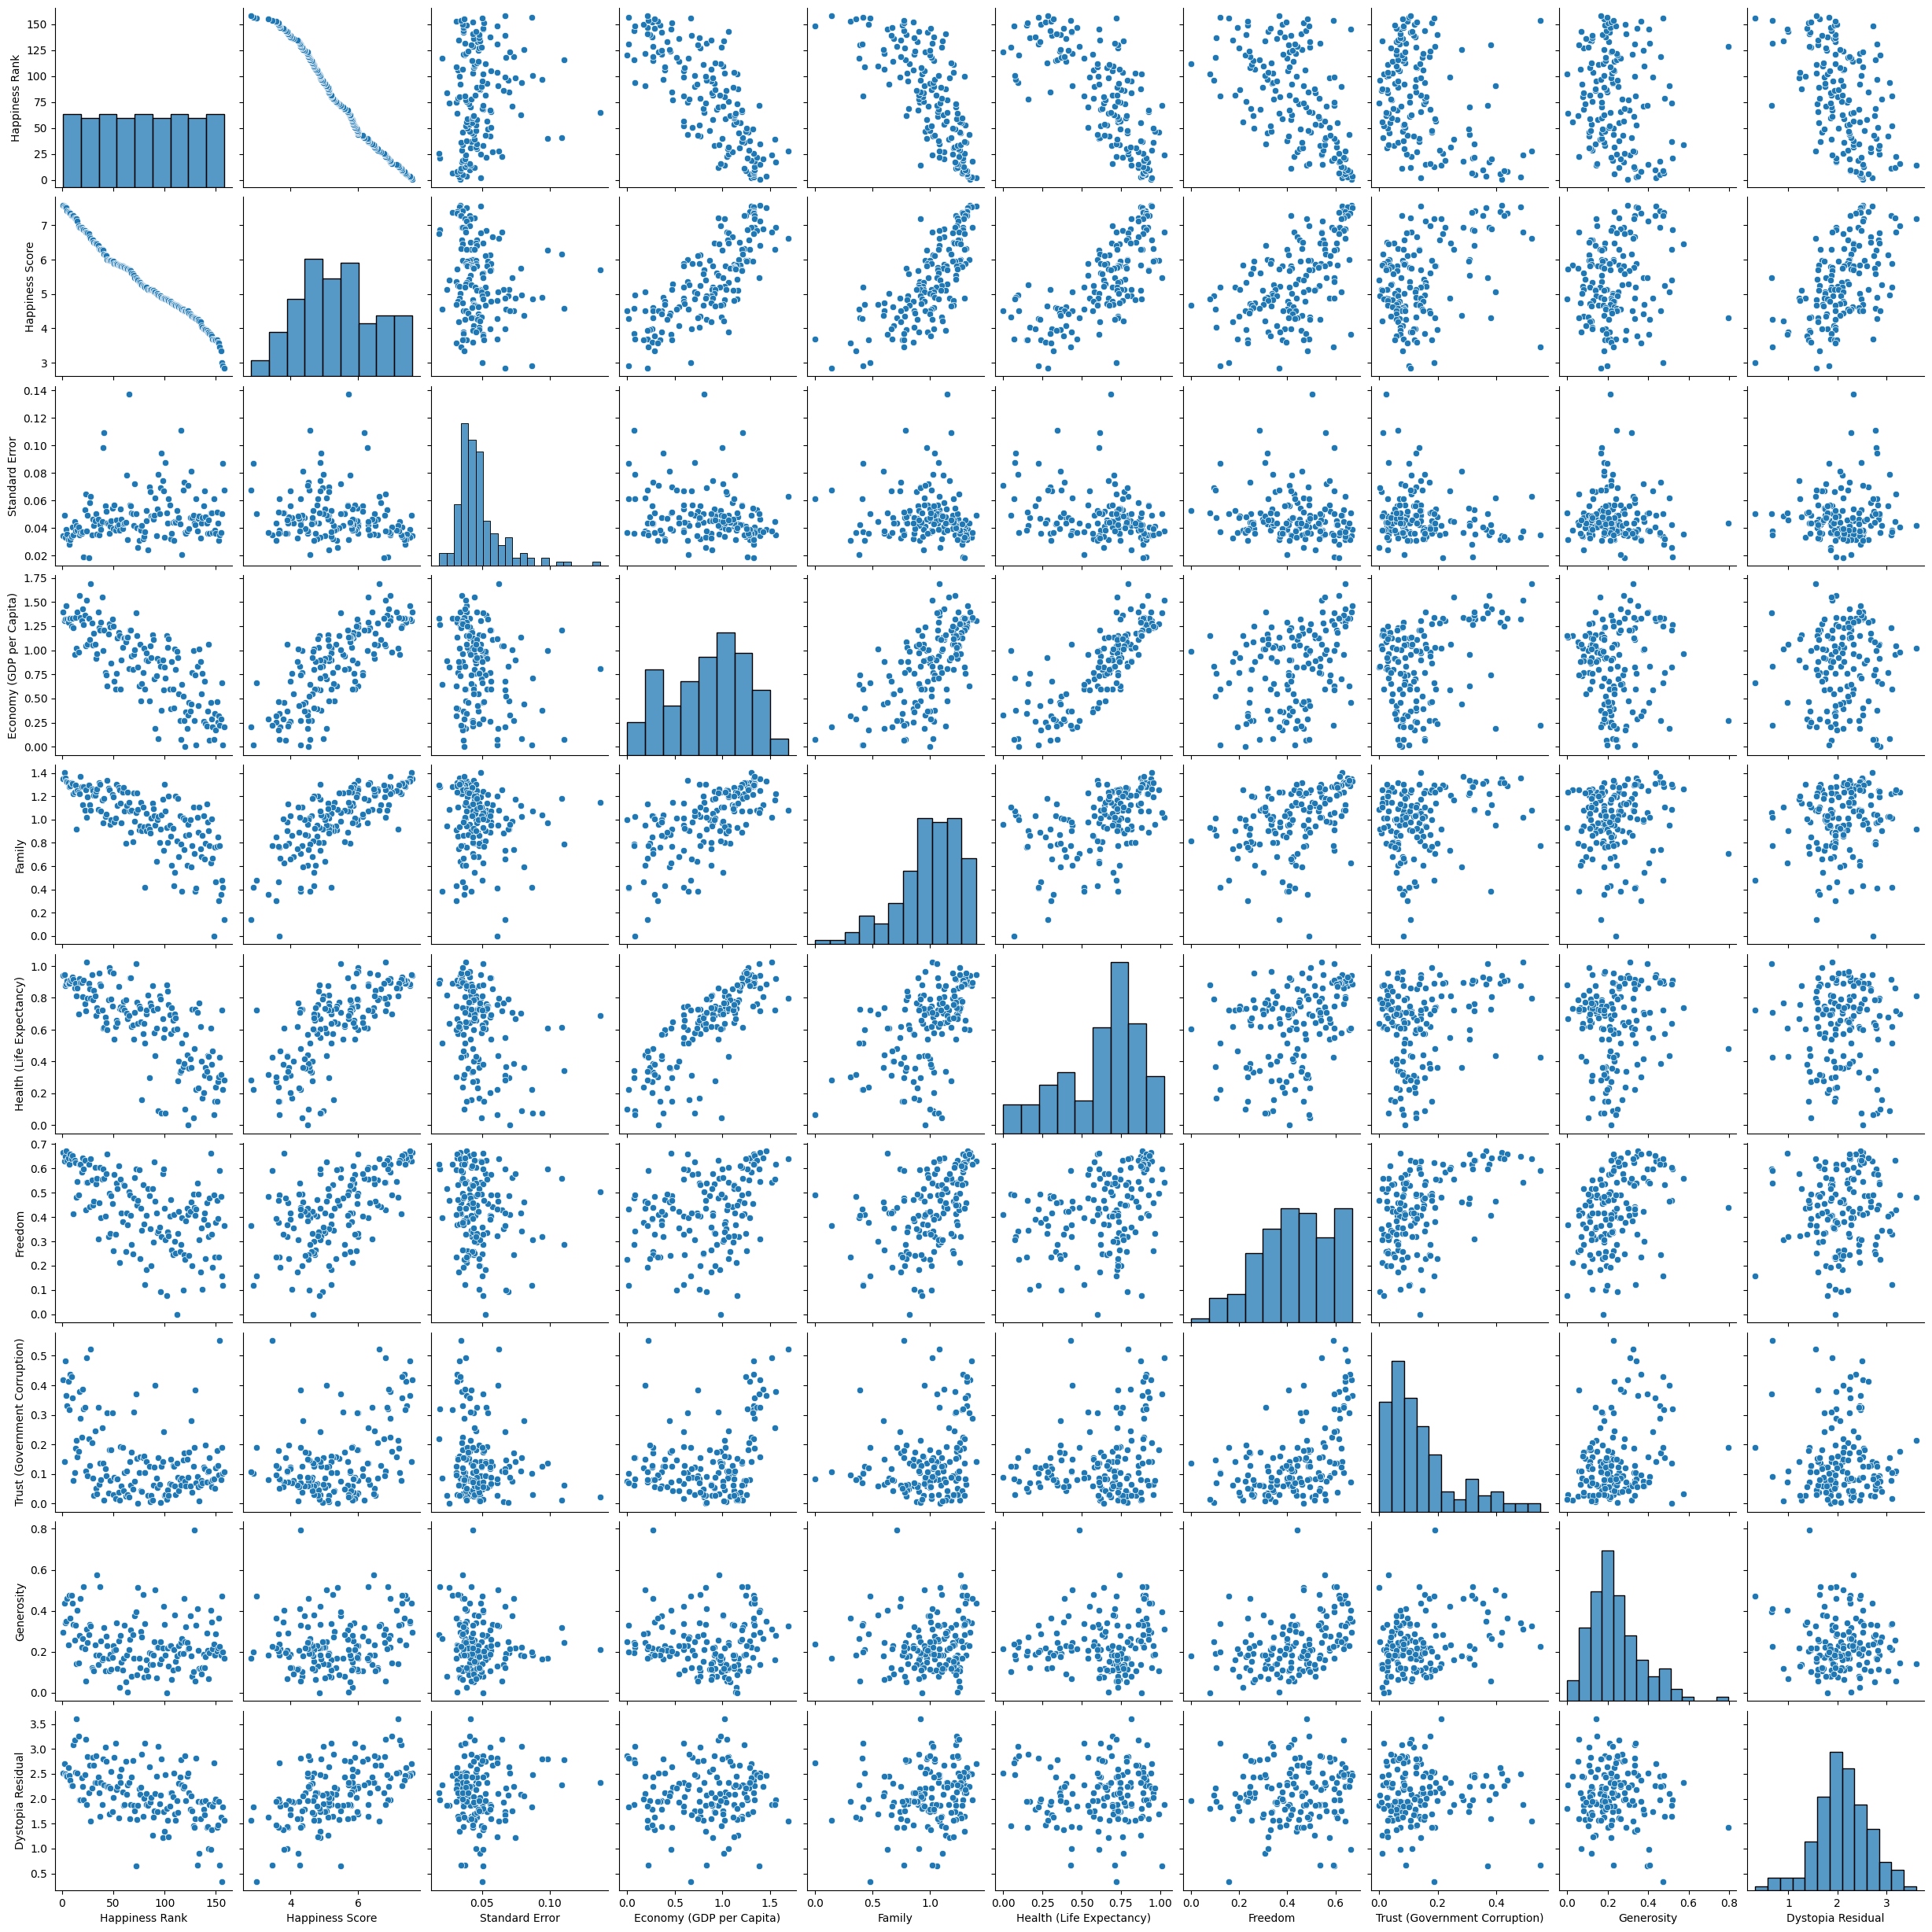

In [42]:
sns.pairplot(data=df)

In [43]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


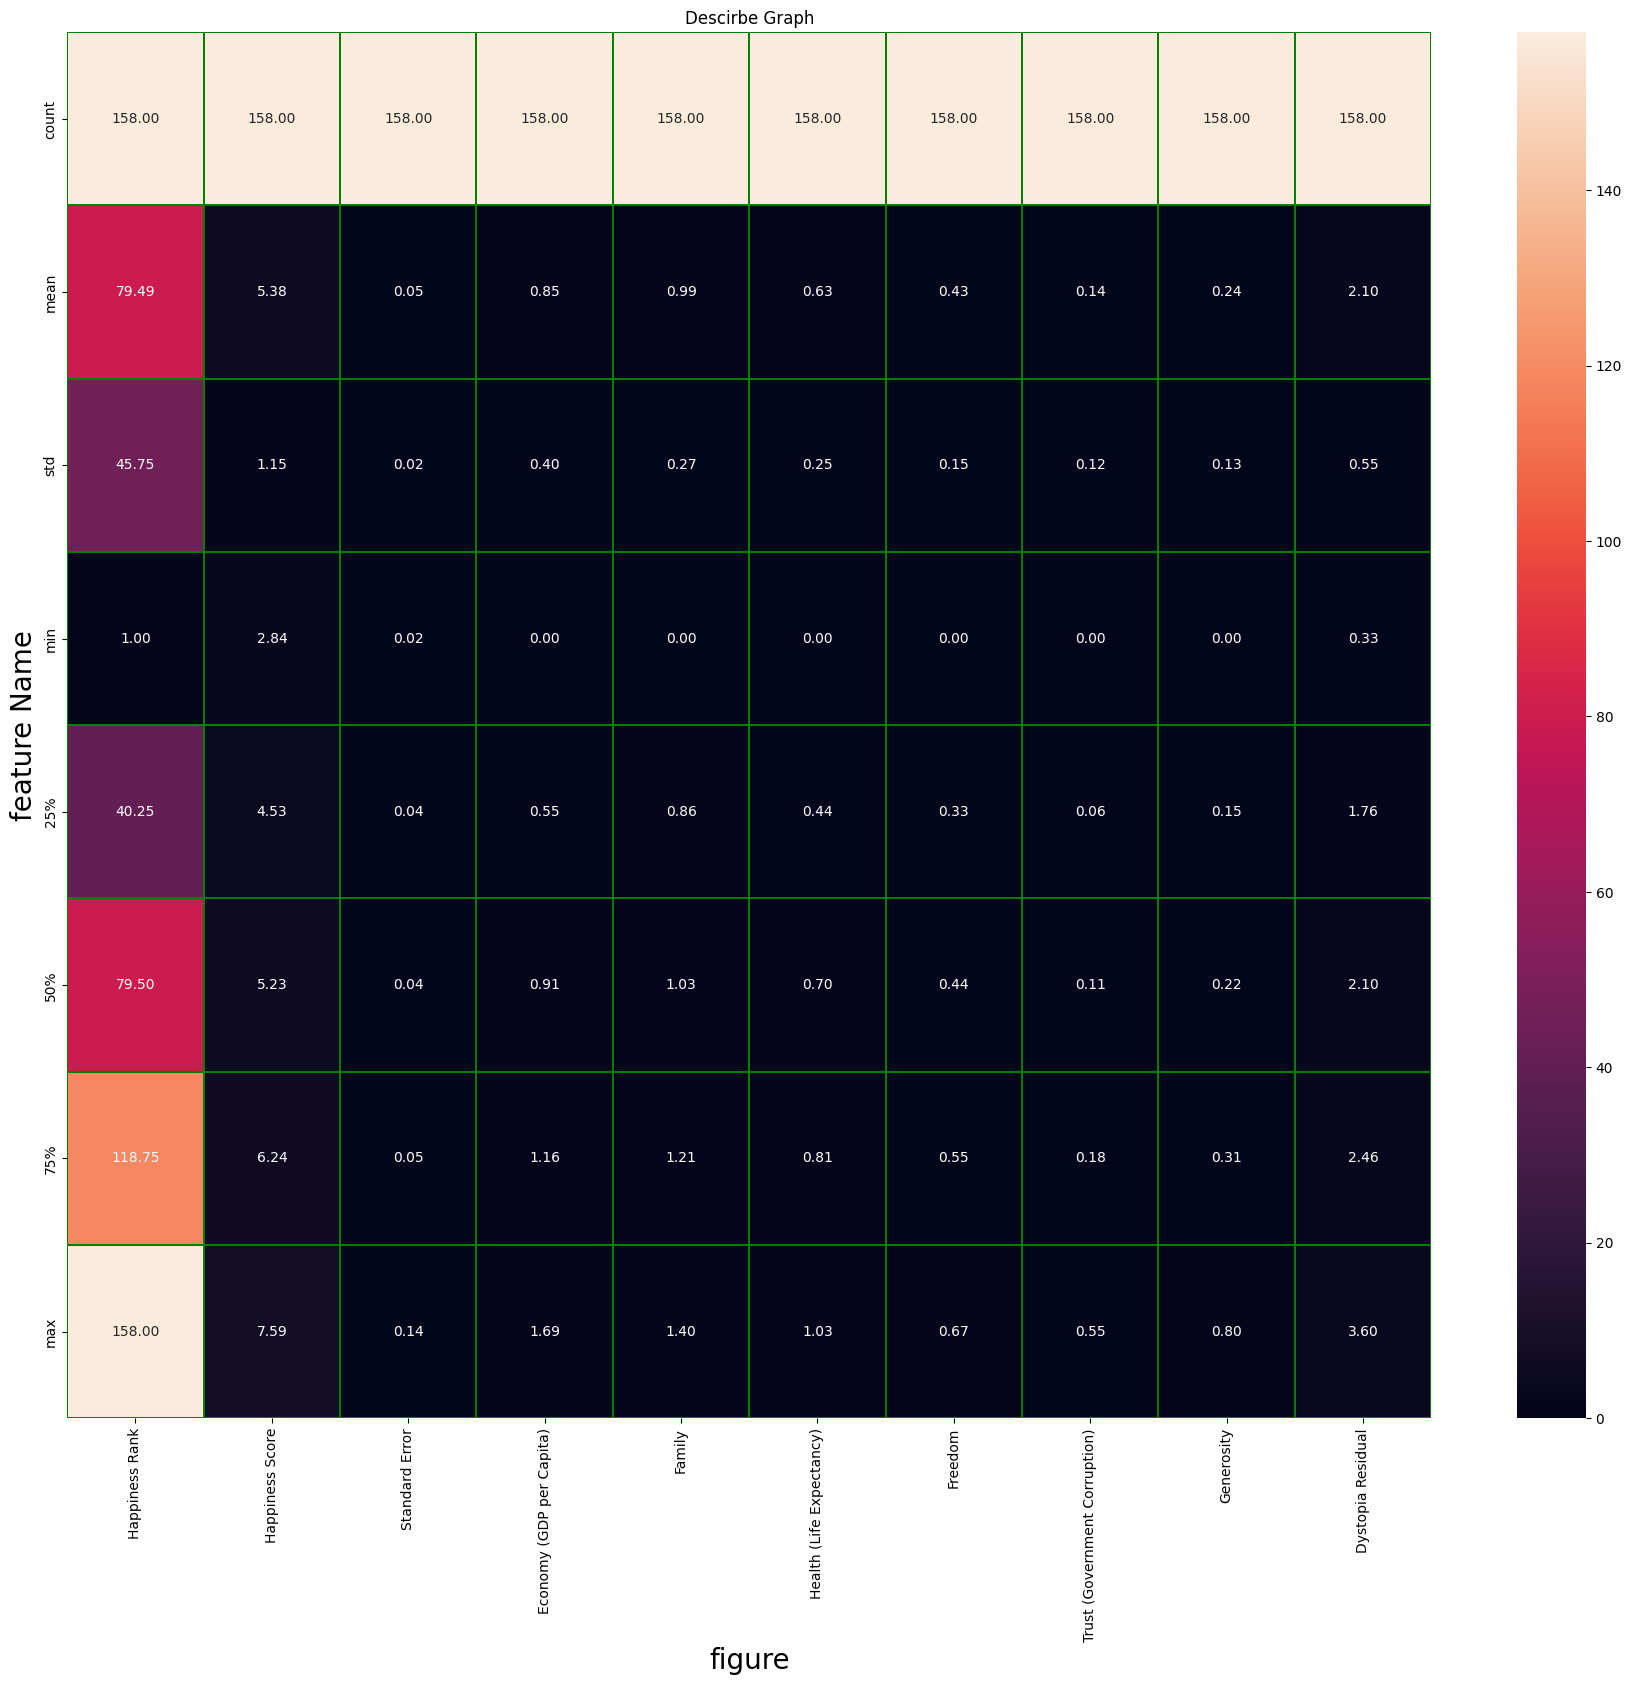

In [44]:
plt.figure(figsize=(22,18))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='green')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature Name',fontsize=20)
plt.title('Descirbe Graph')
plt.show()

In [45]:
happiness_data=df.drop(columns=['Country'])

In [46]:
cor=happiness_data.corr()
print(cor['Happiness Score'].sort_values(ascending=False))
print('****************************************************')
print(cor['Dystopia Residual'].sort_values(ascending=False))


Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64
****************************************************
Dystopia Residual                1.000000
Happiness Score                  0.530474
Family                           0.148117
Standard Error                   0.083981
Freedom                          0.062783
Economy (GDP per Capita)         0.040059
Health (Life Expectancy)         0.018979
Trust (Government Corruption)   -0.033105
Generosity                      -0.101301
Happiness Rank                  -0.521999
Name: Dystopia Residual, dtype: float64


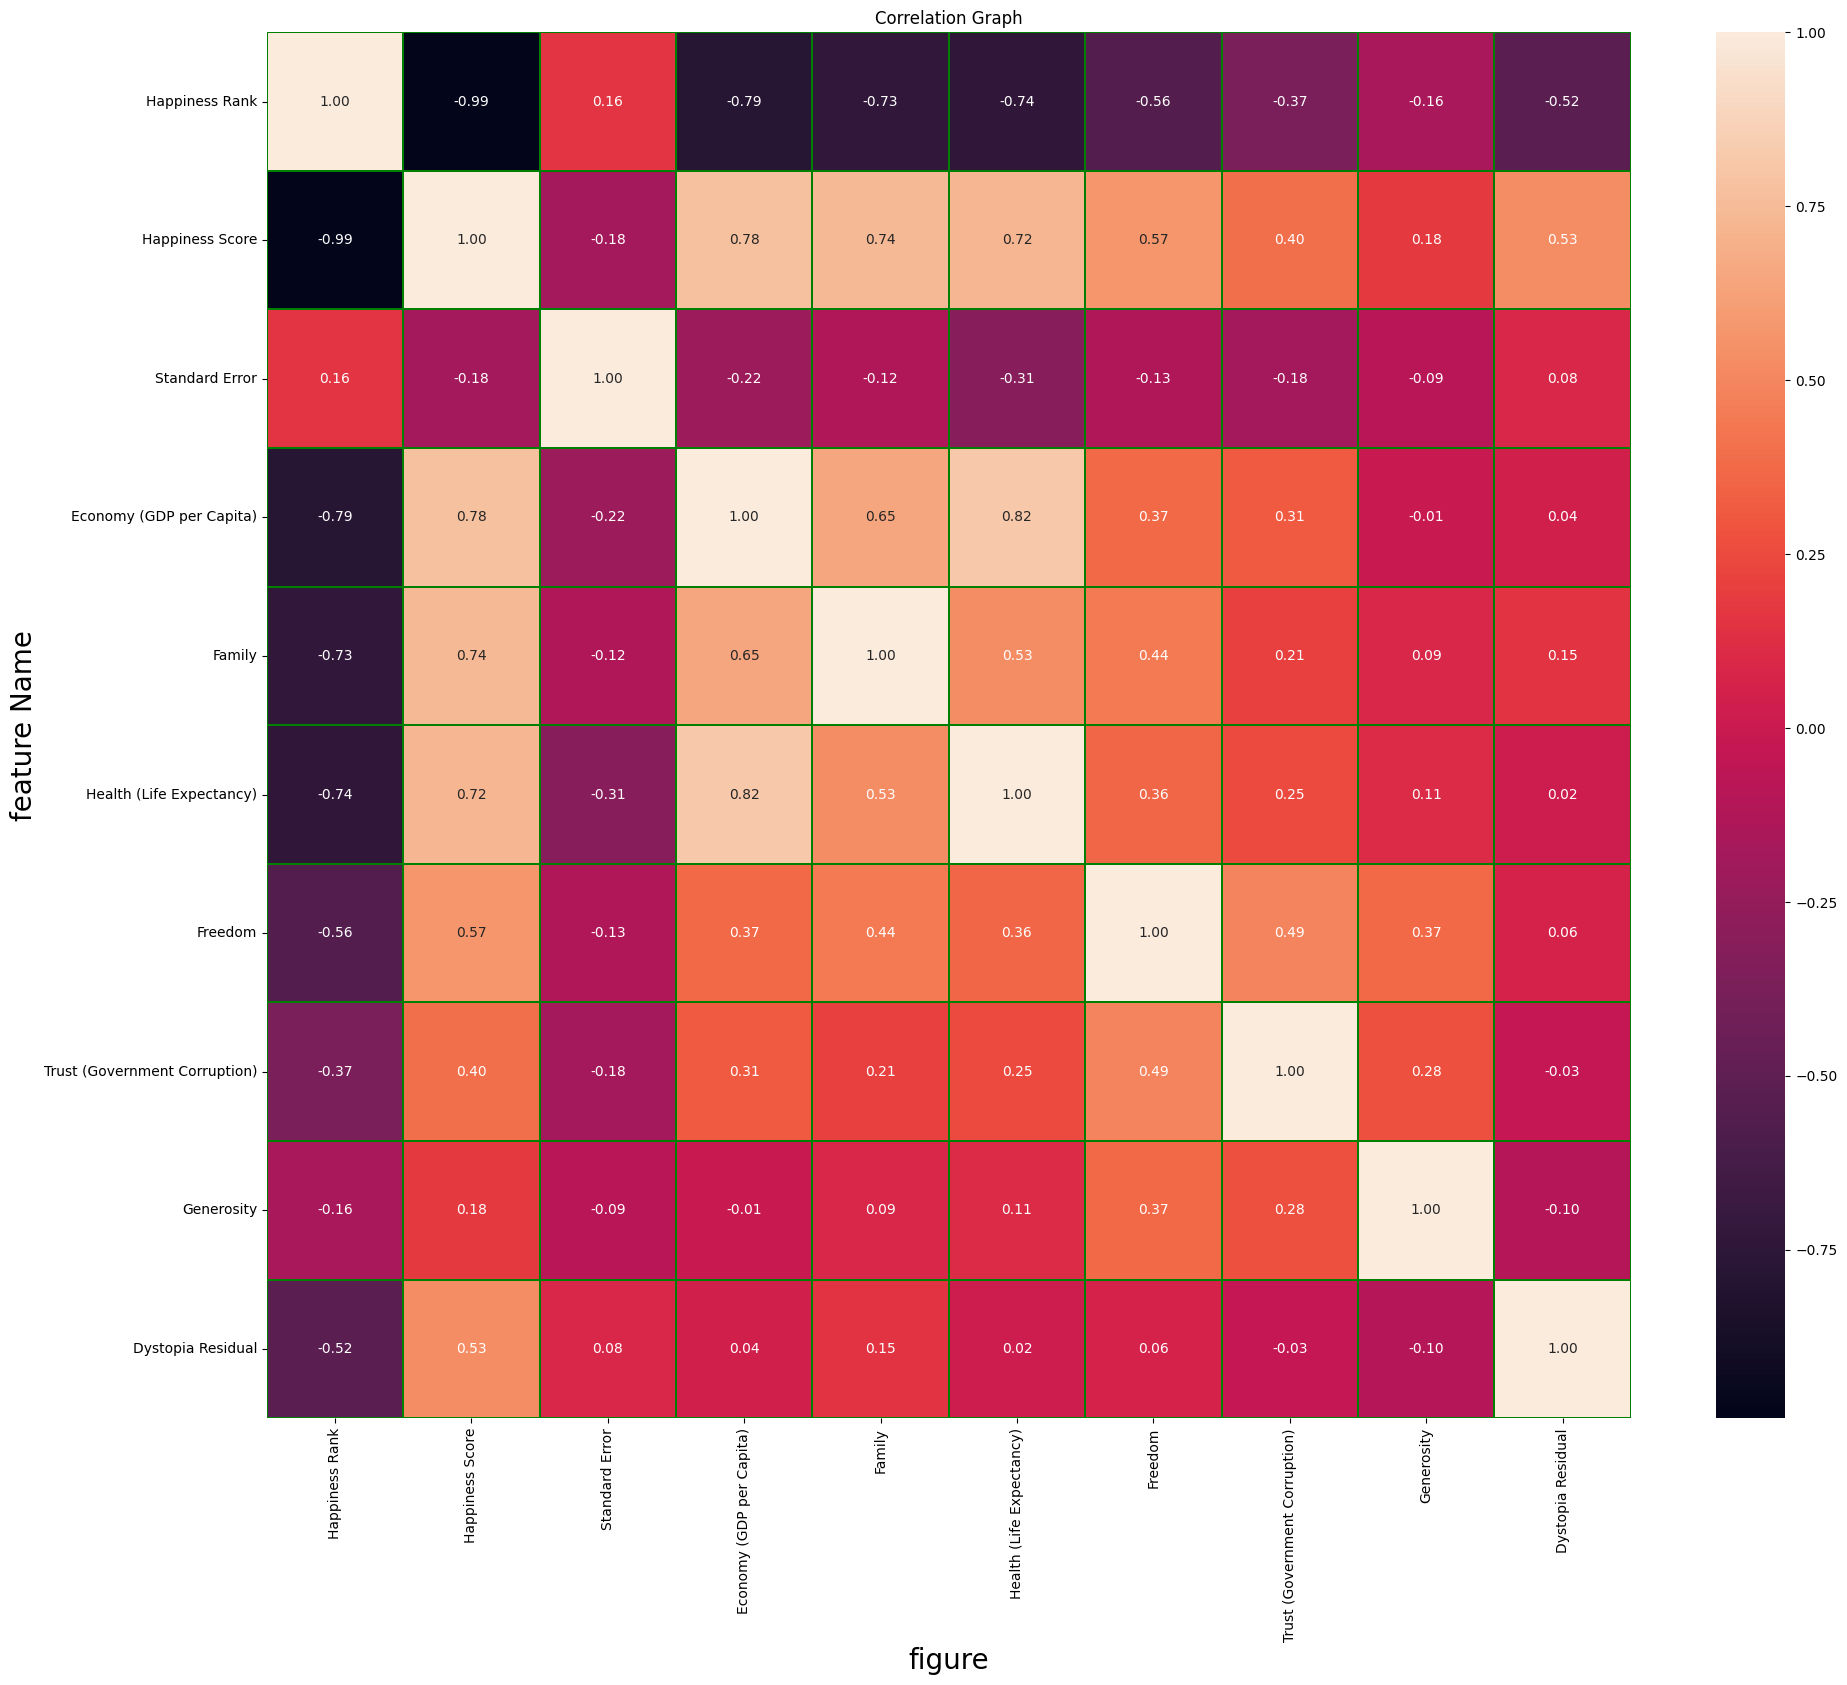

In [47]:
plt.figure(figsize=(22,18))
sns.heatmap(happiness_data.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='green')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature Name',fontsize=20)
plt.title('Correlation Graph')
plt.show()

In [48]:
oe=OrdinalEncoder()
happiness_data['Region']=oe.fit_transform(happiness_data['Region'].values.reshape(-1,1))
happiness_data

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [49]:
happiness_data.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

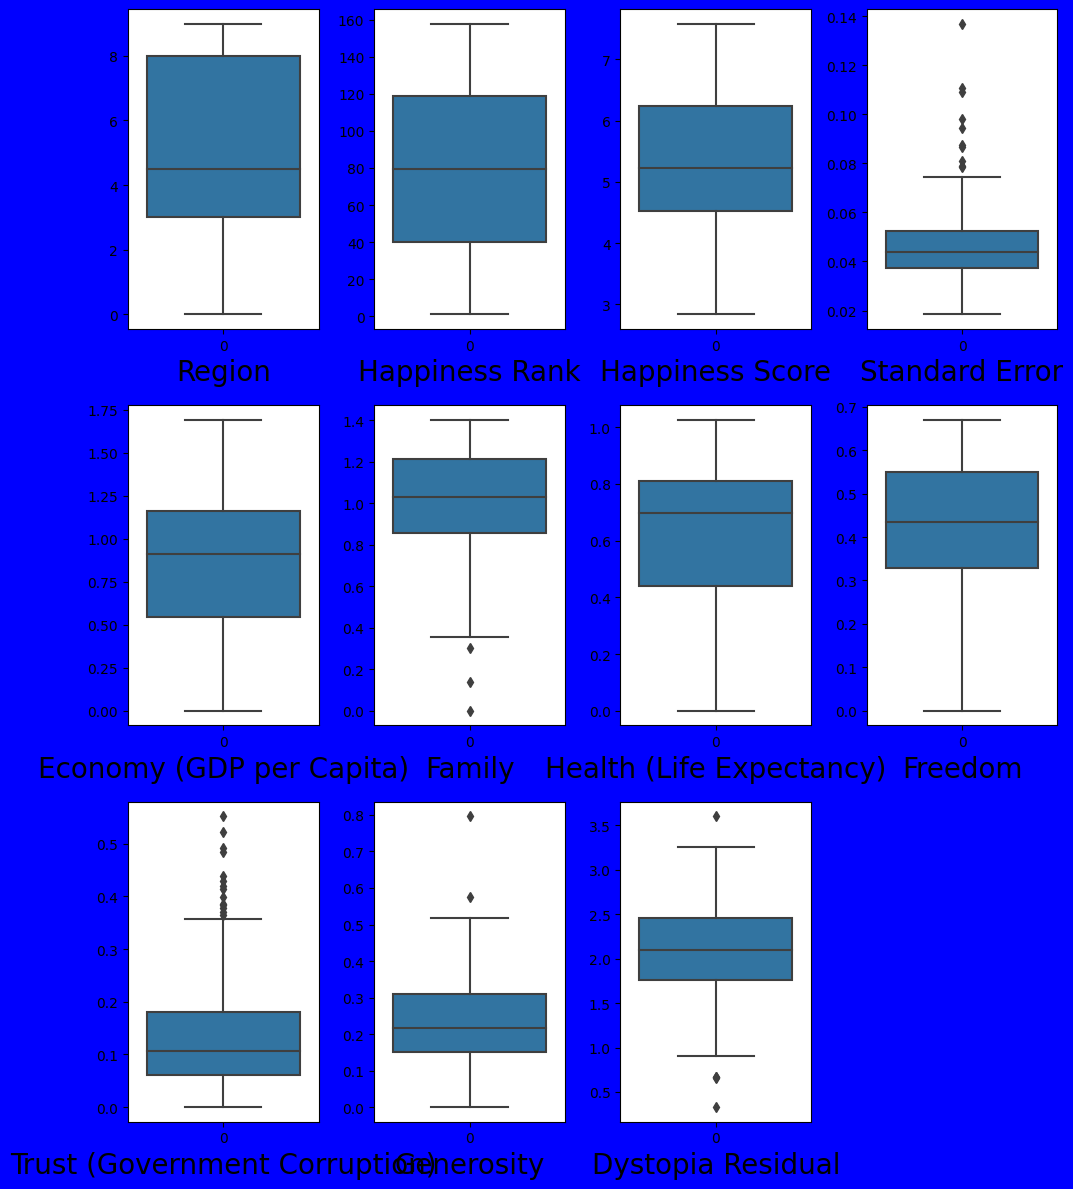

In [50]:
plt.figure(figsize=(10,12),facecolor='blue')
plotnumber=1
for column in happiness_data:
    anext=plt.subplot(3,4,plotnumber)
    sns.boxplot(happiness_data[column])
    plt.xlabel(column,fontsize='20')
    plotnumber+=1
plt.tight_layout()

In [51]:
columns=happiness_data.columns
out_lier=happiness_data[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
happiness_data_z=happiness_data[(z<3).all(axis=1)]
print('## dataloss:')
print((happiness_data.shape[0]-happiness_data_z.shape[0])/(happiness_data.shape[0])*100)

## dataloss:
5.69620253164557


In [52]:
def remove_outlier(value,data):
    q3=data[value].quantile(0.75)
    q1=data[value].quantile(0.25)
    iqr=(q3-q1)
    value_high=(q3+1.5*iqr)
    value_low=(q1-1.5*iqr)
    h_index=np.where(data[value]>value_high)
    l_index=np.where(data[value]<value_low)
    data2=data.drop(data.index[l_index])
    data2.reset_index()
    data3=data2.drop(data.index[h_index])
    data3.reset_index()
    print(pd.DataFrame(data3))
    print('data_loss:',(data.shape[0]-data3.shape[0])/(data.shape[0])*100)
    
remove_outlier('Standard Error',data=happiness_data)

     Region  Happiness Rank  Happiness Score  Standard Error  \
0       9.0               1            7.587         0.03411   
1       9.0               2            7.561         0.04884   
2       9.0               3            7.527         0.03328   
3       9.0               4            7.522         0.03880   
4       5.0               5            7.427         0.03553   
..      ...             ...              ...             ...   
152     7.0             153            3.575         0.03084   
153     8.0             154            3.465         0.03464   
154     8.0             155            3.340         0.03656   
155     4.0             156            3.006         0.05015   
157     8.0             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   


In [53]:
x=happiness_data_z.drop(columns=['Happiness Score'])
y=happiness_data_z['Happiness Score']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

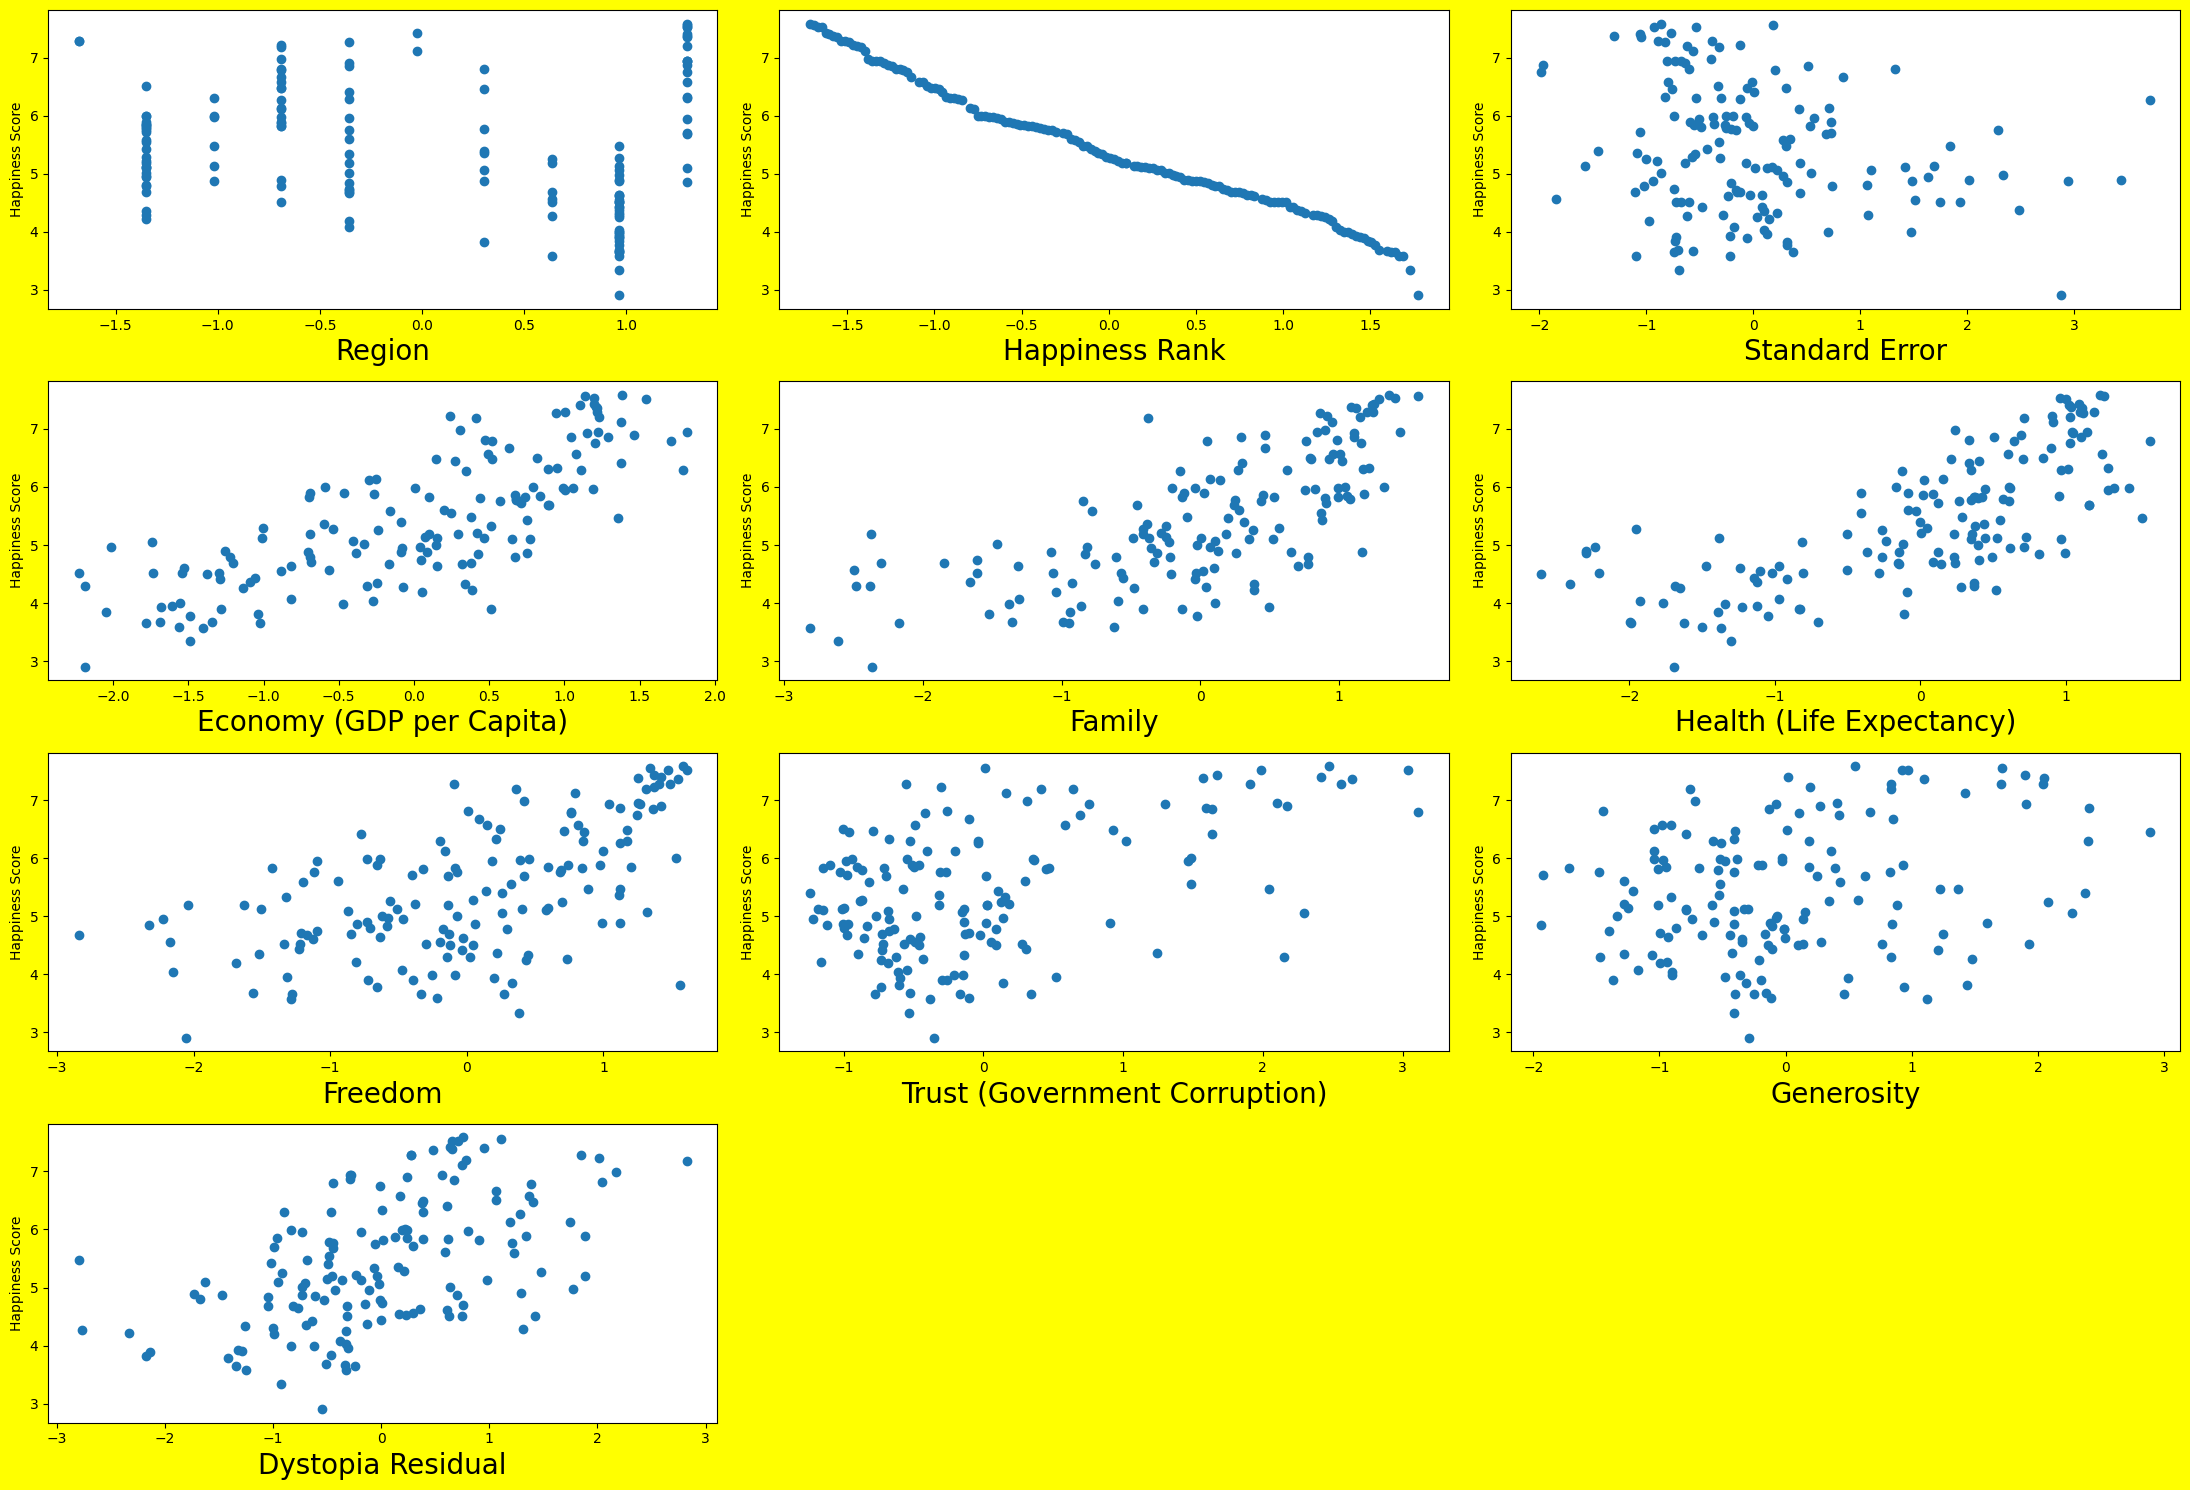

In [54]:
plt.figure(figsize=(22,15), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber<=11:
        anext=plt.subplot(4,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize='20')
        plt.ylabel('Happiness Score',fontsize=10)
    plotnumber+=1
plt.tight_layout() 

In [55]:
v_i_f=pd.DataFrame()
v_i_f['vif_val']= [vif(x,i) for i in range(len(x.columns))]
v_i_f['feature']=(x.columns)
v_i_f

,vif_val,feature
0,1.482541,Region
1,86.416062,Happiness Rank
2,1.216850,Standard Error
3,14.031093,Economy (GDP per Capita)
4,6.465276,Family
5,9.057715,Health (Life Expectancy)
6,3.628312,Freedom
7,1.996017,Trust (Government Corruption)
8,2.254450,Generosity
9,20.092534,Dystopia Residual


In [56]:
x=x.drop(columns=['Happiness Rank'])

In [57]:
v_i_f=pd.DataFrame()
v_i_f['vif_val']= [vif(x,i) for i in range(len(x.columns))]
v_i_f['feature']=(x.columns)
v_i_f

,vif_val,feature
0,1.420880,Region
1,1.187656,Standard Error
2,4.277028,Economy (GDP per Capita)
3,1.942085,Family
4,3.982022,Health (Life Expectancy)
5,1.868880,Freedom
6,1.497593,Trust (Government Corruption)
7,1.473424,Generosity
8,1.036508,Dystopia Residual


In [58]:
max_accu=0
max_rs=0

for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    regression_lr=LinearRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    accuracy=r2_score(y_test,pred)
    if accuracy> max_accu:
        max_accu=accuracy
        max_rs=i

print('Maximum accuracy:',max_accu, 'on random state:',max_rs)        

Maximum accuracy: 0.9999999670486875 on random state: 623


In [59]:
regression_lr=LinearRegression()
regression_lr.fit(x_train,y_train)
pred_lr=regression_lr.predict(x_test)
pred_lr_train=regression_lr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_lr))
print('r2_score on training data=',r2_score(y_train,pred_lr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_lr))
print('mean_squared_error=', mean_squared_error(y_test,pred_lr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_lr=cross_val_score(regression_lr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_lr)
print('avg:',cv_score_lr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_lr)-cv_score_lr.mean())*100)

r2_score= 0.9999999340695394
r2_score on training data= 0.9999999377012563
mean_absolute_error= 0.0002569281854209781
mean_squared_error= 8.581559453015745e-08
root_mean_square_error 0.00029294298853216723
_______________________CV_SCORE_ANALYSIS________________________
cv_score [0.99999943 0.99999855 0.99999822 0.99999527 0.99999926]
avg: 0.9999981481711602
Difference between R2_score and CV is: 0.00017858983791807503


In [60]:
regression_svr=SVR()
regression_svr.fit(x_train,y_train)
pred_svr=regression_svr.predict(x_test)
pred_svr_train=regression_svr.predict(x_train)
print('r2_score=',r2_score(y_test,pred_svr))
print('r2_score on training data=',r2_score(y_train,pred_svr_train))
print('mean_absolute_error=',mean_absolute_error(y_test,pred_svr))
print('mean_squared_error=', mean_squared_error(y_test,pred_svr))
print('root_mean_square_error',np.sqrt(mean_squared_error(y_test,pred_svr)))
print('                                                                 ')
print('_______________________CV_SCORE_ANALYSIS________________________')
cv_score_svr=cross_val_score(regression_svr,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_svr)
print('avg:',cv_score_svr.mean())
print('Difference between R2_score and CV is:',(r2_score(y_test,pred_svr)-cv_score_svr.mean())*100)

r2_score=

 0.9718528040676656
r2_score on training data= 0.9833907096615013
mean_absolute_error= 0.15586971715097075
mean_squared_error= 0.03663660667044579
root_mean_square_error 0.1914069138522582
                                                                 
_______________________CV_SCORE_ANALYSIS________________________
cv_score [-12.34626218   0.12517895   0.77053553  -0.53319241  -5.68530081]
avg: -3.5338081821410983
Difference between R2_score and CV is: 450.5660986208764


In [61]:
from sklearn.model_selection import GridSearchCV
final_model=Ridge(alpha=1,copy_X=True,fit_intercept=True,max_iter=None,tol=0.001,solver='auto',normalize='deprecated',positive='False',random_state='None')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

99.99743788549814


In [62]:
file_name='WINE.pkl'
pickle.dump(final_model,open(file_name,'wb'))